# Analyzing Boston AirBnB Data (2016-2017)

This analysis will focus on three insights: 

1. During what months can we expect peak season for AirBnB bookings? 
2. Are there certain neighborhoods that are highly rated compared to others? 
3. Which attributes are highly correlated with listing price?

In [1]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

**Data Preparation: First, let's familirize ourselves with the datasets and make necessary changes for analysis**

In [2]:
#Gathering datasources
listings = pd.read_csv(r'C:\Users\mntre\OneDrive\Documents\Data Scientist NanoDegree\boston listings.csv')
reviews = pd.read_csv(r'C:\Users\mntre\OneDrive\Documents\Data Scientist NanoDegree\reviews.csv')
calendar = pd.read_csv(r'C:\Users\mntre\OneDrive\Documents\Data Scientist NanoDegree\calendar.csv')

print(listings.shape)
print(reviews.shape)
print(calendar.shape)

(3585, 95)
(68275, 6)
(1308890, 4)


In [3]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
#Finding percentage of null values for each column 
null_listings = listings.isnull().sum() / len(listings) * 100
null_listings

id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.000000
summary                               3.988842
space                                29.483961
description                           0.000000
experiences_offered                   0.000000
neighborhood_overview                39.470014
notes                                55.090656
transit                              35.983264
access                               41.534170
interaction                          43.347280
house_rules                          33.249651
thumbnail_url                        16.708508
medium_url                           16.708508
picture_url                           0.000000
xl_picture_url                       16.708508
host_id                               0.000000
host_url                              0.000000
host_name    

In [5]:
#Dropping columns with more than 75% null values and gathering shape
listings_drop = listings.loc[:, listings.isnull().sum() < 0.75*listings.shape[0]]
listings_drop.isnull().sum()/len(listings) * 100

id                                   0.000000
listing_url                          0.000000
scrape_id                            0.000000
last_scraped                         0.000000
name                                 0.000000
summary                              3.988842
space                               29.483961
description                          0.000000
experiences_offered                  0.000000
neighborhood_overview               39.470014
notes                               55.090656
transit                             35.983264
access                              41.534170
interaction                         43.347280
house_rules                         33.249651
thumbnail_url                       16.708508
medium_url                          16.708508
picture_url                          0.000000
xl_picture_url                      16.708508
host_id                              0.000000
host_url                             0.000000
host_name                         

In [6]:
#Selecting features relevant to analysis from listings data source
listingsdf = ['id', 'calculated_host_listings_count', 'name', 'description', 'maximum_nights', 'bed_type', 'accommodates', 
                    'room_type', 'minimum_nights', 'number_of_reviews', 'host_id', 'host_since', 'host_name', 'host_is_superhost',
                   'latitude', 'longitude', 'amenities', 'street', 'neighbourhood_cleansed', 'instant_bookable', 'availability_365',
                   'host_listings_count', 'listing_url', 'extra_people', 'price', 'review_scores_rating', 'review_scores_value', 
                  'reviews_per_month','bathrooms','bedrooms','host_response_rate','zipcode','beds']
listingsdf = listings[listingsdf]
listingsdf

,id,calculated_host_listings_count,name,description,maximum_nights,bed_type,accommodates,room_type,minimum_nights,number_of_reviews,...,extra_people,price,review_scores_rating,review_scores_value,reviews_per_month,bathrooms,bedrooms,host_response_rate,zipcode,beds
0,12147973,1,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",1125,Real Bed,4,Entire home/apt,2,0,...,$0.00,$250.00,NaN,NaN,NaN,1.5,2.0,NaN,02131,3.0
1,3075044,1,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,15,Real Bed,2,Private room,2,36,...,$0.00,$65.00,94.0,9.0,1.30,1.0,1.0,100%,02131,1.0
2,6976,1,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",45,Real Bed,2,Private room,3,41,...,$20.00,$65.00,98.0,10.0,0.47,1.0,1.0,100%,02131,1.0
3,1436513,1,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,1125,Real Bed,4,Private room,1,1,...,$25.00,$75.00,100.0,10.0,1.00,1.0,1.0,100%,NaN,2.0
4,7651065,1,Come Home to Boston,"My comfy, clean and relaxing home is one block...",31,Real Bed,2,Private room,2,29,...,$0.00,$79.00,99.0,10.0,2.25,1.5,1.0,100%,02131,2.0
5,12386020,1,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,1125,Real Bed,2,Private room,2,8,...,$0.00,$75.00,100.0,10.0,1.70,1.0,1.0,100%,02131,1.0
6,5706985,3,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,1125,Real Bed,3,Entire home/apt,1,57,...,$25.00,$100.00,90.0,9.0,4.00,1.0,1.0,98%,02131,2.0
7,2843445,2,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",1125,Real Bed,2,Private room,1,67,...,$15.00,$75.00,96.0,10.0,2.38,2.0,1.0,100%,02131,1.0
8,753446,1,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,1125,Real Bed,2,Private room,2,65,...,$0.00,$58.00,96.0,10.0,5.36,1.0,1.0,100%,02131,2.0
9,849408,2,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,10,Real Bed,5,Entire home/apt,4,33,...,$25.00,$229.00,94.0,9.0,1.01,1.0,2.0,100%,02131,2.0


In [7]:
#Find missing values from our new dataframe that only contains variables of interest
listingsdf.isnull().sum()/len(listings) * 100

id                                 0.000000
calculated_host_listings_count     0.000000
name                               0.000000
description                        0.000000
maximum_nights                     0.000000
bed_type                           0.000000
accommodates                       0.000000
room_type                          0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
host_id                            0.000000
host_since                         0.000000
host_name                          0.000000
host_is_superhost                  0.000000
latitude                           0.000000
longitude                          0.000000
amenities                          0.000000
street                             0.000000
neighbourhood_cleansed             0.000000
instant_bookable                   0.000000
availability_365                   0.000000
host_listings_count                0.000000
listing_url                     

In [8]:
#Since only 22% of data is missing from 3 columns we will drop the null rows - does not make too much sense to impute these values
listings_new = listingsdf.dropna(axis=0, how='any')
listings_new.isnull().sum()
listings_new

,id,calculated_host_listings_count,name,description,maximum_nights,bed_type,accommodates,room_type,minimum_nights,number_of_reviews,...,extra_people,price,review_scores_rating,review_scores_value,reviews_per_month,bathrooms,bedrooms,host_response_rate,zipcode,beds
1,3075044,1,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,15,Real Bed,2,Private room,2,36,...,$0.00,$65.00,94.0,9.0,1.30,1.0,1.0,100%,02131,1.0
2,6976,1,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",45,Real Bed,2,Private room,3,41,...,$20.00,$65.00,98.0,10.0,0.47,1.0,1.0,100%,02131,1.0
4,7651065,1,Come Home to Boston,"My comfy, clean and relaxing home is one block...",31,Real Bed,2,Private room,2,29,...,$0.00,$79.00,99.0,10.0,2.25,1.5,1.0,100%,02131,2.0
5,12386020,1,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,1125,Real Bed,2,Private room,2,8,...,$0.00,$75.00,100.0,10.0,1.70,1.0,1.0,100%,02131,1.0
6,5706985,3,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,1125,Real Bed,3,Entire home/apt,1,57,...,$25.00,$100.00,90.0,9.0,4.00,1.0,1.0,98%,02131,2.0
7,2843445,2,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",1125,Real Bed,2,Private room,1,67,...,$15.00,$75.00,96.0,10.0,2.38,2.0,1.0,100%,02131,1.0
8,753446,1,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,1125,Real Bed,2,Private room,2,65,...,$0.00,$58.00,96.0,10.0,5.36,1.0,1.0,100%,02131,2.0
9,849408,2,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,10,Real Bed,5,Entire home/apt,4,33,...,$25.00,$229.00,94.0,9.0,1.01,1.0,2.0,100%,02131,2.0
10,12023024,1,Cozy room in a well located house,The room is in a single family house located i...,1125,Real Bed,2,Private room,1,1,...,$10.00,$60.00,80.0,10.0,0.36,1.0,1.0,83%,02131,1.0
11,1668313,2,Room in Rozzie-Twin Bed-Full Bath,Quiet second floor bedroom sleeps one in comfo...,1125,Real Bed,1,Private room,1,17,...,$0.00,$57.00,94.0,9.0,0.48,1.0,1.0,100%,02131,1.0


In [9]:
#Now let's look at our stats
listings_new.describe()

,id,calculated_host_listings_count,maximum_nights,accommodates,minimum_nights,number_of_reviews,host_id,latitude,longitude,availability_365,host_listings_count,review_scores_rating,review_scores_value,reviews_per_month,bathrooms,bedrooms,beds
count,2.502000e+03,2502.000000,2.502000e+03,2502.000000,2502.000000,2502.000000,2.502000e+03,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000
mean,7.682755e+06,10.760991,4.077858e+04,3.100320,2.886091,26.362110,2.297287e+07,42.338952,-71.083196,199.109113,45.387690,92.056755,9.172662,2.148609,1.219824,1.256595,1.643885
std,4.431033e+06,24.392721,1.999184e+06,1.860791,7.032925,39.753076,2.208856e+07,0.025436,0.031560,135.232880,143.410233,8.947489,0.973337,2.168322,0.506494,0.776315,1.082687
min,3.353000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.000000,4.240000e+03,42.235942,-71.171469,0.000000,1.000000,20.000000,2.000000,0.020000,0.000000,0.000000,0.000000
25%,4.053729e+06,1.000000,1.800000e+02,2.000000,1.000000,4.000000,5.220548e+06,42.325547,-71.104165,59.250000,1.000000,89.000000,9.000000,0.630000,1.000000,1.000000,1.000000
50%,7.789242e+06,2.000000,1.125000e+03,2.000000,2.000000,11.000000,1.646758e+07,42.344884,-71.076872,248.000000,2.000000,94.000000,9.000000,1.420000,1.000000,1.000000,1.000000
75%,1.192197e+07,6.000000,1.125000e+03,4.000000,3.000000,31.000000,3.286813e+07,42.355193,-71.061618,327.000000,7.000000,98.000000,10.000000,3.000000,1.000000,2.000000,2.000000
max,1.484378e+07,136.000000,1.000000e+08,16.000000,273.000000,404.000000,9.185532e+07,42.389982,-71.000100,365.000000,749.000000,100.000000,10.000000,19.150000,6.000000,5.000000,16.000000


In [10]:
#Reviewing reviews dataset
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [11]:
#Convert review_ variables from float to int 
listings_new.review_scores_rating = listings_new.review_scores_rating.astype(int)
listings_new.review_scores_value = listings_new.review_scores_value.astype(int)
listings_new.reviews_per_month = listings_new.reviews_per_month.astype(int)

#Convert price from string to float
listings_new.price = listings_new.price.astype(str).str.replace(',','')
listings_new.price = listings_new.price.astype(str).str.replace('$','')
listings_new.price = listings_new.price.astype(float)

listings_new.dtypes

C:\Users\mntre\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


id                                  int64
calculated_host_listings_count      int64
name                               object
description                        object
maximum_nights                      int64
bed_type                           object
accommodates                        int64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
host_id                             int64
host_since                         object
host_name                          object
host_is_superhost                  object
latitude                          float64
longitude                         float64
amenities                          object
street                             object
neighbourhood_cleansed             object
instant_bookable                   object
availability_365                    int64
host_listings_count                 int64
listing_url                        object
extra_people                      

In [12]:
#Reviewing calendar dataset
calendar.head(10)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [13]:
#Dropping rows with nulls as well as the price column since we are only interested in number of listings
calendar_drop = calendar.dropna(axis=1)
calendar_drop.head(10)

,listing_id,date,available
0,12147973,2017-09-05,f
1,12147973,2017-09-04,f
2,12147973,2017-09-03,f
3,12147973,2017-09-02,f
4,12147973,2017-09-01,f
5,12147973,2017-08-31,f
6,12147973,2017-08-30,f
7,12147973,2017-08-29,f
8,12147973,2017-08-28,f
9,12147973,2017-08-27,f


In [14]:
#Checking the data types for each column
types = calendar_drop.dtypes
types

listing_id     int64
date          object
available     object
dtype: object

In [15]:
#Changing date from object to date
calendar_drop.date = calendar_drop.date.astype('datetime64[ns]')
calendar_drop.head(10)

C:\Users\mntre\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,listing_id,date,available
0,12147973,2017-09-05,f
1,12147973,2017-09-04,f
2,12147973,2017-09-03,f
3,12147973,2017-09-02,f
4,12147973,2017-09-01,f
5,12147973,2017-08-31,f
6,12147973,2017-08-30,f
7,12147973,2017-08-29,f
8,12147973,2017-08-28,f
9,12147973,2017-08-27,f


In [16]:
calendar_drop.dtypes

listing_id             int64
date          datetime64[ns]
available             object
dtype: object

## First Question: During what months can we expect peak season for AirBnB bookings?

In [17]:
#Finding count of availability=f to show booked listings and create dataframe
booked_listings = calendar_drop.copy()

booked_listings = booked_listings[booked_listings['available']=='f']
booked_listings = booked_listings.groupby('date')['listing_id'].count()
booked_listings

booked_listings=pd.DataFrame({'date': booked_listings.index, 'booked listings': booked_listings.values})
booked_listings.head(10)

,booked listings,date
0,3016,2016-09-06
1,2654,2016-09-07
2,2587,2016-09-08
3,2605,2016-09-09
4,2630,2016-09-10
5,2602,2016-09-11
6,2681,2016-09-12
7,2726,2016-09-13
8,2791,2016-09-14
9,2811,2016-09-15


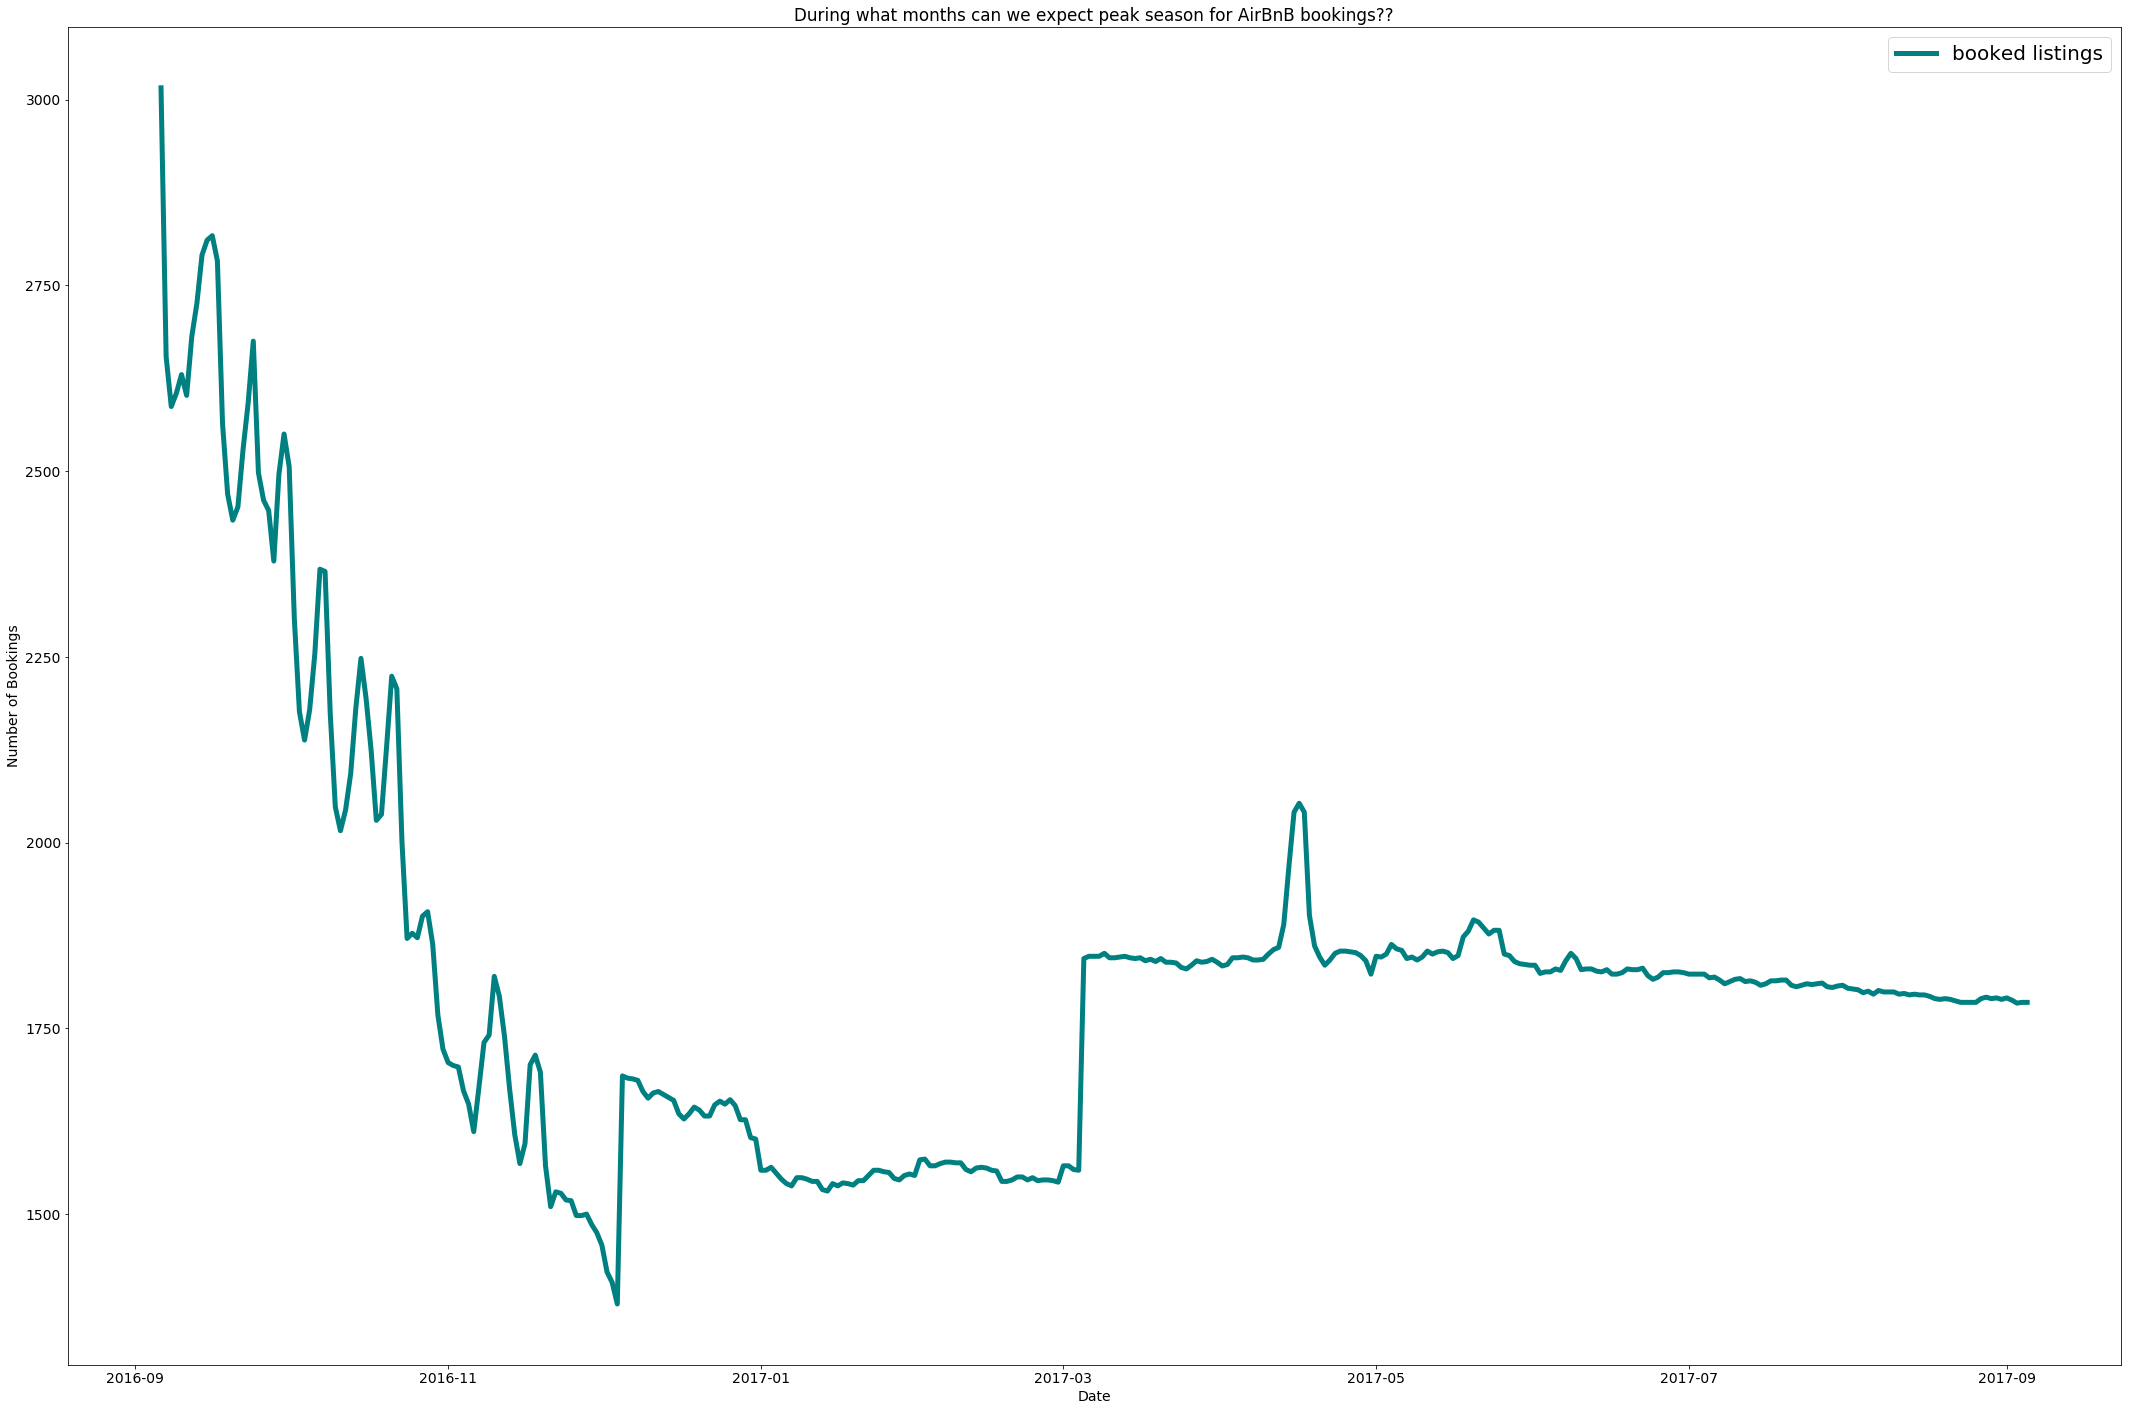

In [19]:
#Creating a trend line to show number of listings versus date

plt.figure(figsize=(30,20))
locs, labels = plt.xticks()

plt.title('During what months can we expect peak season for AirBnB bookings??')
plt.ylabel('Number of Bookings')
plt.xlabel('Date')

plt.rcParams.update({'font.size': 20})
plt.plot( 'date', 'booked listings', data=booked_listings, marker='', markerfacecolor='blue', color='teal', linewidth=5)
plt.legend()
plt.tight_layout()

In [20]:
#To find the peaks let's sort the number of bookings based on sum and sort from high to low 
max_listings = booked_listings.sort_values(by=['booked listings'], ascending=False)
max_listings.head(10)

,booked listings,date
0,3016,2016-09-06
10,2817,2016-09-16
9,2811,2016-09-15
8,2791,2016-09-14
11,2783,2016-09-17
7,2726,2016-09-13
6,2681,2016-09-12
18,2675,2016-09-24
1,2654,2016-09-07
4,2630,2016-09-10


In [21]:
#To find the periods with least # of bookings let's sort the number of bookings based on sum and sort from low to high
max_listings = booked_listings.sort_values(by=['booked listings'], ascending=True)
max_listings.head(10)

,booked listings,date
89,1379,2016-12-04
88,1408,2016-12-03
87,1422,2016-12-02
86,1458,2016-12-01
85,1475,2016-11-30
84,1486,2016-11-29
82,1498,2016-11-27
81,1498,2016-11-26
83,1500,2016-11-28
76,1510,2016-11-21


## Second Question: Are there certain neighborhoods that are highly rated compared to others?
For this analysis we will use the listings dataset. 

In [22]:
listings_new.head()

,id,calculated_host_listings_count,name,description,maximum_nights,bed_type,accommodates,room_type,minimum_nights,number_of_reviews,...,extra_people,price,review_scores_rating,review_scores_value,reviews_per_month,bathrooms,bedrooms,host_response_rate,zipcode,beds
1,3075044,1,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,15,Real Bed,2,Private room,2,36,...,$0.00,65.0,94,9,1,1.0,1.0,100%,02131,1.0
2,6976,1,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...",45,Real Bed,2,Private room,3,41,...,$20.00,65.0,98,10,0,1.0,1.0,100%,02131,1.0
4,7651065,1,Come Home to Boston,"My comfy, clean and relaxing home is one block...",31,Real Bed,2,Private room,2,29,...,$0.00,79.0,99,10,2,1.5,1.0,100%,02131,2.0
5,12386020,1,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,1125,Real Bed,2,Private room,2,8,...,$0.00,75.0,100,10,1,1.0,1.0,100%,02131,1.0
6,5706985,3,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,1125,Real Bed,3,Entire home/apt,1,57,...,$25.00,100.0,90,9,4,1.0,1.0,98%,02131,2.0


In [24]:
listings_new.columns

Index(['id', 'calculated_host_listings_count', 'name', 'description',
       'maximum_nights', 'bed_type', 'accommodates', 'room_type',
       'minimum_nights', 'number_of_reviews', 'host_id', 'host_since',
       'host_name', 'host_is_superhost', 'latitude', 'longitude', 'amenities',
       'street', 'neighbourhood_cleansed', 'instant_bookable',
       'availability_365', 'host_listings_count', 'listing_url',
       'extra_people', 'price', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month', 'bathrooms', 'bedrooms', 'host_response_rate',
       'zipcode', 'beds'],
      dtype='object')

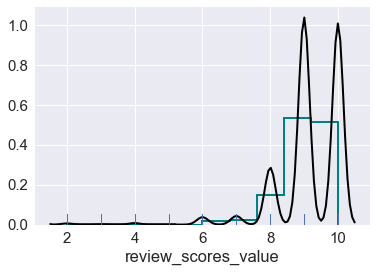

In [25]:
#Use histogram to show the distribution of scores
import seaborn as sns

sns.set(font_scale=1.5) 
sns.distplot(listings_new.review_scores_value, bins=10, rug=True, 
                  kde_kws={"color": "k", "lw": 2},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "teal"})

In [26]:
#Gather average review score per listing
listingsdf = listings_new.copy()
listings_scores = listingsdf.groupby('neighbourhood_cleansed')['review_scores_value'].mean().sort_values(ascending=False)
listings_scores=pd.DataFrame({'neighbourhood': listings_scores.index, 'average review score': listings_scores.values})
listings_scores

,average review score,neighbourhood
0,9.562500,Roslindale
1,9.500000,Leather District
2,9.453184,Jamaica Plain
3,9.451613,West Roxbury
4,9.385714,Charlestown
5,9.374101,South Boston
6,9.333333,Longwood Medical Area
7,9.283333,Brighton
8,9.268750,Beacon Hill
9,9.254237,South End


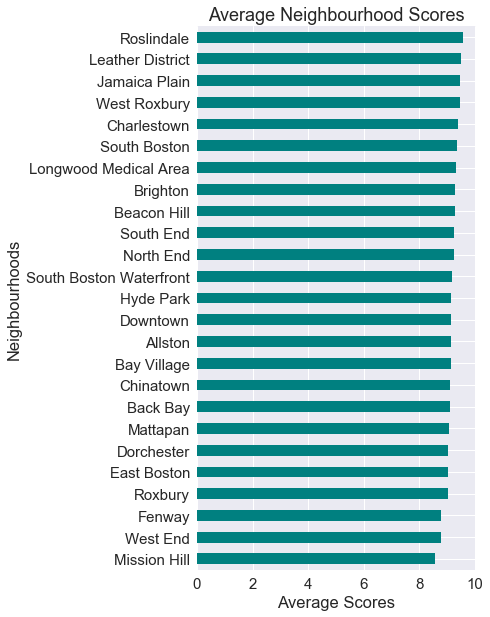

In [27]:
#Create bar chart for each neighbourhood to visually see the highest rated 

listings_scores = listingsdf.groupby('neighbourhood_cleansed')['review_scores_value'].mean().sort_values(ascending=True).plot(kind='barh', color='teal',figsize=(5, 10))
plt.title('Average Neighbourhood Scores')
plt.xlabel('Average Scores')
plt.ylabel('Neighbourhoods')
plt.show()

## Third Question: Which attributes are highly correlated with listing price? 

Text(0.5,1,'Histogram of Listing Prices in $')

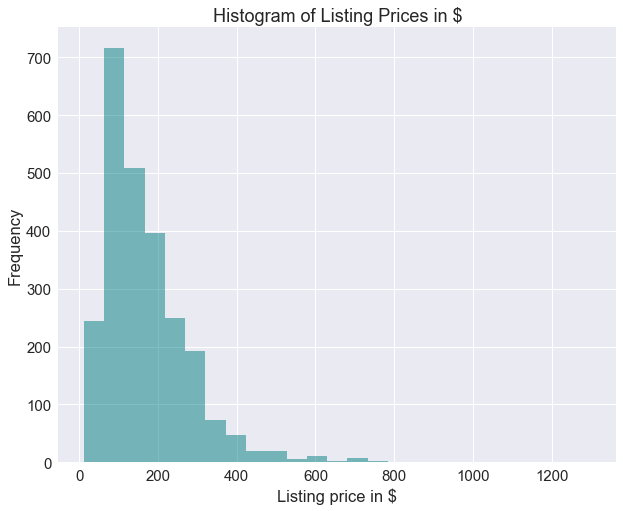

In [30]:
#Plot to see distribution of price 
num_bins=25
plt.figure(figsize=[10,8])

plt.hist(listingsdf['price'], num_bins, color='teal', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Listing price in $')
plt.title('Histogram of Listing Prices in $')

We need to convert our categorical variables into numerical values to allow correlation analysis

In [43]:
#Creating a copy of listingsdf dataset 
listings_encoded = listingsdf.copy()

#Encoding room type variable
listings_encoded.replace({'Entire home/apt': 0,  'Shared room':1, 'Private room':2}, inplace=True)

#Encoding list of neighborhoods
listings_encoded.replace({'Allston':0,
 'Back Bay':1,'Bay Village':2,'Beacon Hill':3,'Brighton':4,'Charlestown':5,'Chinatown':6,'Dorchester':7,'Downtown':8,
 'East Boston':9,'Fenway':10,'Hyde Park':11,'Jamaica Plain':12,'Leather District':13,'Longwood Medical Area':14,
 'Mattapan':15,'Mission Hill':16, 'North End':17,'Roslindale':18,'Roxbury':19,'South Boston':20,'South Boston Waterfront':21,
 'South End':22,'West End':23,'West Roxbury':24},inplace=True)

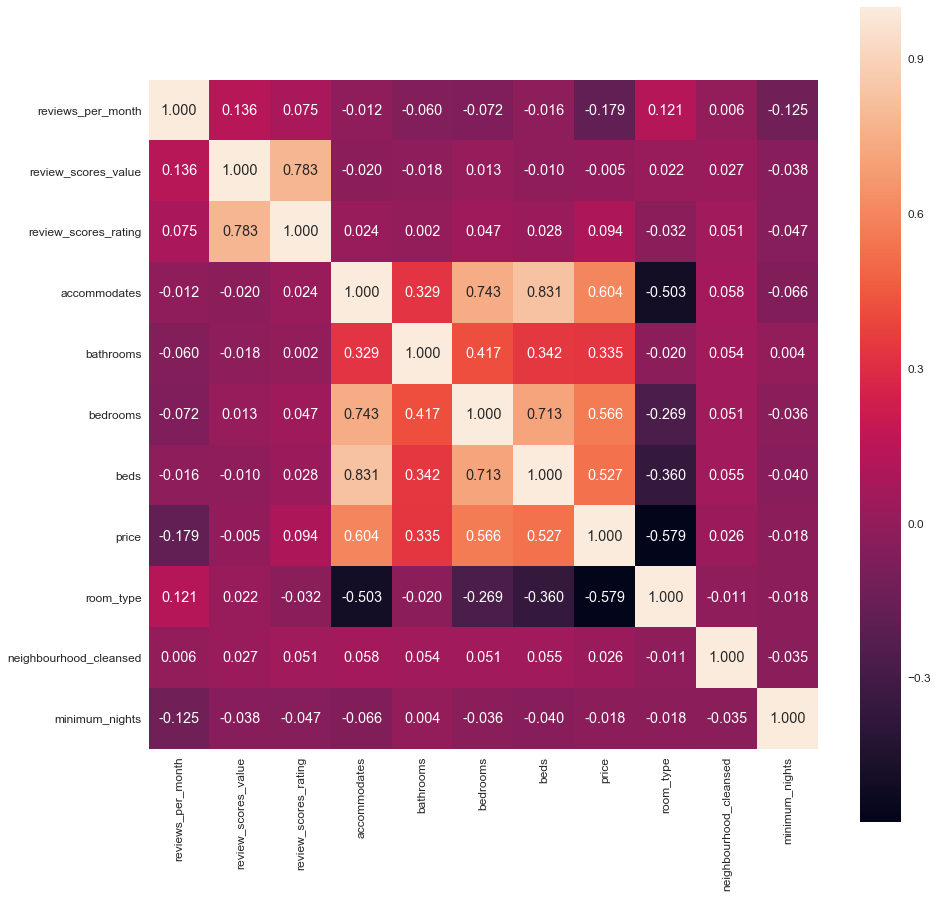

In [44]:
#Finding correlations through correlation matrix
cols = ['reviews_per_month','review_scores_value','review_scores_rating','accommodates',
       'bathrooms','bedrooms','beds','price','room_type', 'neighbourhood_cleansed','minimum_nights']


corrs = np.corrcoef(listings_encoded[cols].values.T)
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.2)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.3f',
              yticklabels = cols, xticklabels = cols)